#In This Course of machine learning

In [ ]:
# 1: Romoving duplicate
# 2: Handle missing values
# 3: Normalize and scale numerical data
# 4: Detect and remove outliers using visualization and Z-score methods
# 5: Encode categorical steps are essential for ensuring clean and reliable data for analysis or modeling

In [2]:
#import necessary libraries
import pandas as pd
from scipy import stats
#Ignore all warninigs preventing then from being desplayed during execution.
#It is commonly used to supperss non-critical warnings in Jupyter notebooks or scripts
# from warnings import filterwarngs
# filterwarnings('ignore')

In [13]:
#Load the Dataset
df = pd.read_csv('/content/Simple Date.csv')
#Display the first few rows
df.head()

,ID,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,1,Asad,25,Female,90041.86,31/01/2017,Fales,Creative
1,2,Asad,31,Male,90285.02,29/05/2019,Fales,Needs Improverment
2,3,Numan,30,Male,84321.65,14/12/2022,Fales,Hardworking
3,4,Khan,45,Male,68189.99,05/09/2023,TRUE,Fast Learner
4,5,Sinan,34,Male,35428.35,19/05/2018,TRUE,Dedicated


In [14]:
df.dtypes

,0
ID,int64
Name,object
Age,int64
Gender,object
Salary,float64
Joining Date,object
Is Active,object
Comments,object


In [15]:
#Remove duplicate rows
df_cleaned = df.drop_duplicates()
#display the clean dataset
df_cleaned.head()


,ID,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,1,Asad,25,Female,90041.86,31/01/2017,Fales,Creative
1,2,Asad,31,Male,90285.02,29/05/2019,Fales,Needs Improverment
2,3,Numan,30,Male,84321.65,14/12/2022,Fales,Hardworking
3,4,Khan,45,Male,68189.99,05/09/2023,TRUE,Fast Learner
4,5,Sinan,34,Male,35428.35,19/05/2018,TRUE,Dedicated


#Handle Missing Values

In [16]:
#Check for remaining missing values
df_cleaned.isnull().sum()

#This dataset has currently no missing values

,0
ID,0
Name,0
Age,0
Gender,0
Salary,0
Joining Date,0
Is Active,0
Comments,0


In [47]:
# if we have missing values we can use this following common method to fill missing vlaues with column mean
#inplace = modifies the DataFrame directly without creating a new copy.
#In this code, it fills missing values in the "Age" column with the column's mean and updates df_cleaned in place.
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].mean())
df_cleaned['Salary'] = df_cleaned['Salary'].fillna(df_cleaned['Salary'].mean())


#Now check again for missing values
df_cleaned.isnull().sum()

,0
ID,0
Age,0
Gender,0
Salary,0
Name_Khan,0
Name_Numan,0
Name_Sinan,0
Joining Date_14/12/2022,0
Joining Date_19/05/2018,0
Joining Date_29/05/2019,0


#Normalize and Scale the Data

In [19]:
from sklearn.preprocessing import MinMaxScaler

#Initialize the scaler
scaler = MinMaxScaler()

#Apply Min-Max Scaling to 'Age' and 'Salary'
df_cleaned[['Age', 'Salary']]= scaler.fit_transform(df_cleaned[['Age','Salary']])

#show scaled data
df_cleaned[['Age', 'Salary']].head()

,Age,Salary
0,0.00,0.995567
1,0.30,1.000000
2,0.25,0.891292
3,1.00,0.597223
4,0.45,0.000000


#Scaling

In [20]:
#This scales the values to have mean = 0 and standard deviation = 1 for better distribution.
from sklearn.preprocessing import StandardScaler

#initialize the scaler
scaler = StandardScaler()

#Apply normalization
df_cleaned[['Age', 'Salary']] = scaler.fit_transform(df_cleaned[['Age', 'Salary']])

#Show normalized data
df_cleaned[['Age', 'Salary']].head()

,Age,Salary
0,-1.200600,0.790322
1,-0.300150,0.802048
2,-0.450225,0.514469
3,1.800901,-0.263467
4,0.150075,-1.843371


#Encode Categorical Variables(Optional)

In [22]:
 from sklearn.preprocessing import LabelEncoder

 #Encode 'Genfer' column
 le = LabelEncoder()
 df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
 df_cleaned['Gender'].head()

 #Label Encoding
# Converts each category into a number.
# Example:
# {"Male": 0, "Female": 1}

,Gender
0,0
1,1
2,1
3,1
4,1


#One Hot Encoding
#Creates new columns for each category with 0 or 1 (True/False).
#Example:
#Color: Red, Blue, Green →
#Red → [1, 0, 0]
#Blue → [0, 1, 0]
#Green → [0, 0, 1]

In [24]:
import pandas as pd

#Apply one-hot encoding to all categorical columns

df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

#Display update DataFrame
print(df_cleaned.head())

   ID       Age  Gender    Salary  Name_Khan  Name_Numan  Name_Sinan  \
0   1 -1.200600       0  0.790322      False       False       False   
1   2 -0.300150       1  0.802048      False       False       False   
2   3 -0.450225       1  0.514469      False        True       False   
3   4  1.800901       1 -0.263467       True       False       False   
4   5  0.150075       1 -1.843371      False       False        True   

   Joining Date_14/12/2022  Joining Date_19/05/2018  Joining Date_29/05/2019  \
0                    False                    False                    False   
1                    False                    False                     True   
2                     True                    False                    False   
3                    False                    False                    False   
4                    False                     True                    False   

   Joining Date_31/01/2017  Is Active_TRUE  Comments_Dedicated  \
0                   

#Detect Outliers Using Z-Score Method

In [40]:
from scipy.stats import zscore
#Calculate Z-score for 'Age' and 'Salary'
z_scores = np.abs(zscore(df_cleaned[['Age', 'Salary']]))

#Identify rows with Z-scores > 3 (outliers) # Set threshold (commonly 3)
outlier = (z_scores > 3) .any(axis=1)

#Remove outliers from the dataset
df_no_outliers = df_cleaned[~outlier]

#Display cleaned dataset without ouliers
df_no_outliers.head()

,ID,Age,Gender,Salary,Name_Khan,Name_Numan,Name_Sinan,Joining Date_14/12/2022,Joining Date_19/05/2018,Joining Date_29/05/2019,Joining Date_31/01/2017,Is Active_TRUE,Comments_Dedicated,Comments_Fast Learner,Comments_Hardworking,Comments_Needs Improverment
0,1,-1.200600,0,0.790322,False,False,False,False,False,False,True,False,False,False,False,False
1,2,-0.300150,1,0.802048,False,False,False,False,False,True,False,False,False,False,False,True
2,3,-0.450225,1,0.514469,False,True,False,True,False,False,False,False,False,False,True,False
3,4,1.800901,1,-0.263467,True,False,False,False,False,False,False,True,False,True,False,False
4,5,0.150075,1,-1.843371,False,False,True,False,True,False,False,True,True,False,False,False


#Visualize Data After Removing Outliers

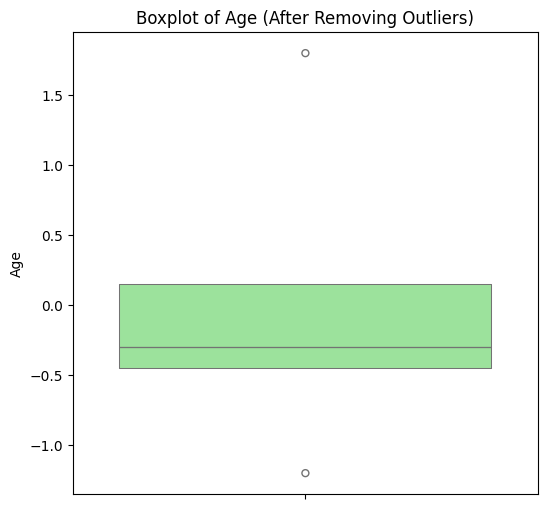

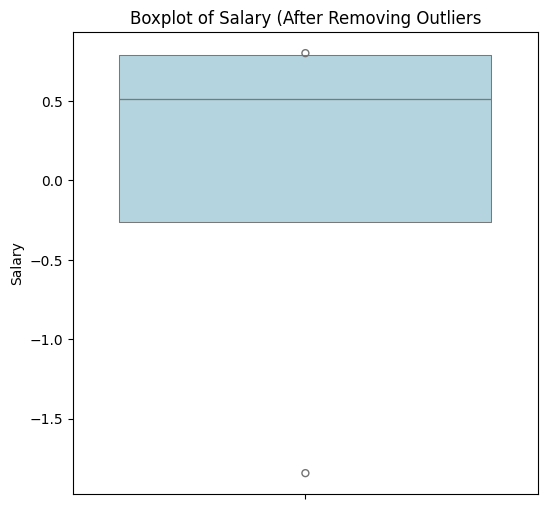

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns  # sns is the standard alias

#Boxplot after removing outliers (Age)
plt.figure(figsize=(6, 6))
sns.boxenplot(data=df_no_outliers['Age'], color = 'lightgreen')
plt.title('Boxplot of Age (After Removing Outliers)')
plt.show()

#Boxplot after removing outlires (Salary)
plt.figure(figsize=(6, 6))
sns.boxenplot(data=df_no_outliers['Salary'], color='lightblue')
plt.title('Boxplot of Salary (After Removing Outliers')
plt.show()